## Dataset
[Kaggle]( https://www.kaggle.com/blastchar/telco-customer-churn)

## Project Summary 
* This project entails performing a MachineLearning Classification task on a set of Customer data
* it attempts to predict customer Churn rate ( rate at which people stop usin a product)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
## Total chagres is meant tobe an integer so
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [19]:
total_charges[total_charges.isnull() == True] ## so there are missing values 

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [21]:
df.iloc[4380]

customerID                   2520-SGTTA
gender                           Female
SeniorCitizen                         0
Partner                             Yes
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                       20
TotalCharges                           
Churn                                No
Name: 4380, dtype: object

In [22]:
df.TotalCharges = total_charges

In [42]:
df[df.isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


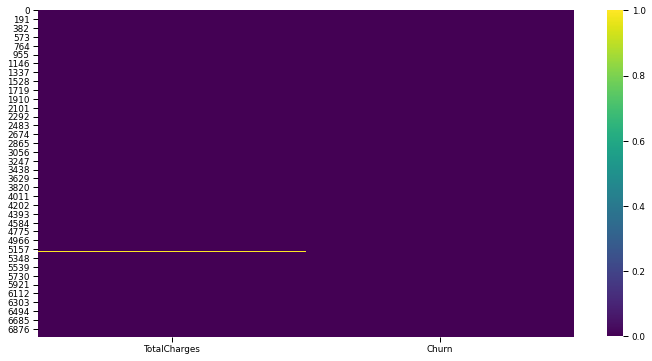

In [58]:
#A faast way of checking for missing data(the yellow line), although not allthe points might appear
plt.figure(figsize=(12,6))
sns.heatmap(df[['TotalCharges','Churn']].isnull(),cmap='viridis')

In [60]:
df.TotalCharges.fillna(0,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## EDA

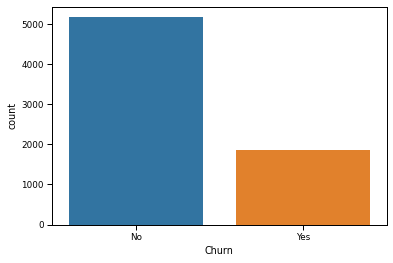

In [69]:
sns.countplot(data=df,x='Churn')

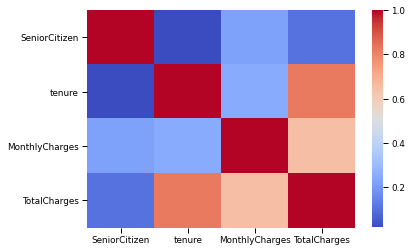

In [72]:
sns.heatmap(df.corr(),cmap='coolwarm')

## dealing with categorical values 


In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.drop(['customerID'],axis=1,inplace=True)

In [128]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [129]:
len(df.columns)

20

In [132]:
categorical=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
new_df = pd.get_dummies(df,columns=categorical,drop_first=True)

In [133]:
new_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [134]:
new_df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

## Spliting and Training 

In [91]:
from sklearn.model_selection import train_test_split 

In [142]:
X = new_df.drop(['Churn'],axis=1)
y = new_df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [109]:
from sklearn.linear_model import LogisticRegression

In [143]:
logreg = LogisticRegression(max_iter =1000).fit(X_train,y_train)

In [158]:
pre = logreg.predict(X_test)

## metrics 

In [113]:
from sklearn. metrics import classification_report,confusion_matrix

In [159]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1537
         Yes       0.67      0.56      0.61       576

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



In [141]:
confusion_matrix(y_test,pre)

array([[1363,  166],
       [ 269,  315]], dtype=int64)

In [147]:
## A second model
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
predict = knn.predict(X_test)

In [151]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          No       0.80      0.79      0.79      1537
         Yes       0.45      0.45      0.45       576

    accuracy                           0.70      2113
   macro avg       0.62      0.62      0.62      2113
weighted avg       0.70      0.70      0.70      2113



## Elbow method 

In [152]:
err = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    predict = knn.predict(X_test)
    err.append(np.mean(y_test != predict))

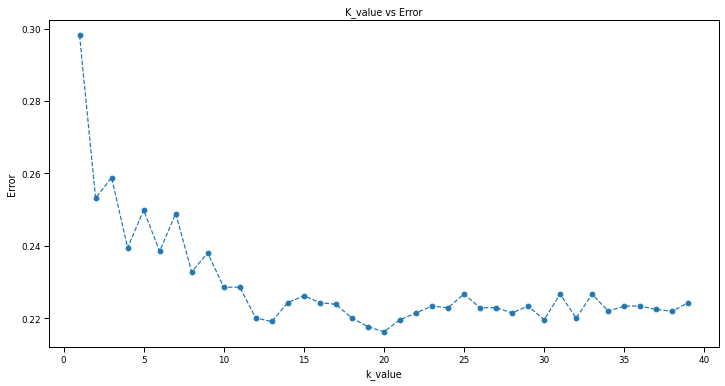

In [153]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),err,ls='--',marker='o')
plt.xlabel('k_value')
plt.ylabel('Error')
plt.title('K_value vs Error')
plt.show()

In [154]:
# K_value with min error = 20
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)
predict2 = knn.predict(X_test)

In [155]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

          No       0.80      0.94      0.86      1537
         Yes       0.69      0.38      0.49       576

    accuracy                           0.78      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.78      0.76      2113

